In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Reading all datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
dict_df = pd.read_csv('data_dictionary.csv')

EDA

In [3]:
train_df = train_df.drop(columns = ['ID'])

In [4]:
train_df.isnull().sum()

dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct                   16597
in_vivo_

In [5]:
test_df.isnull().sum()

ID                        0
dri_score                 0
psych_disturb             0
cyto_score                2
diabetes                  0
hla_match_c_high          1
hla_high_res_8            1
tbi_status                0
arrhythmia                0
hla_low_res_6             0
graft_type                0
vent_hist                 0
renal_issue               0
pulm_severe               0
prim_disease_hct          0
hla_high_res_6            0
cmv_status                0
hla_high_res_10           1
hla_match_dqb1_high       0
tce_imm_match             1
hla_nmdp_6                0
hla_match_c_low           0
rituximab                 0
hla_match_drb1_low        0
hla_match_dqb1_low        0
prod_type                 0
cyto_score_detail         2
conditioning_intensity    2
ethnicity                 0
year_hct                  0
obesity                   0
mrd_hct                   2
in_vivo_tcd               0
tce_match                 2
hla_match_a_high          0
hepatic_severe      

In [6]:
train_df.columns

Index(['dri_score', 'psych_disturb', 'cyto_score', 'diabetes',
       'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia',
       'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue',
       'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status',
       'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6',
       'hla_match_c_low', 'rituximab', 'hla_match_drb1_low',
       'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail',
       'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct',
       'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe',
       'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer',
       'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue',
       'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score',
       'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related',
       'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high',
 

In [7]:
train_df.dtypes

dri_score                  object
psych_disturb              object
cyto_score                 object
diabetes                   object
hla_match_c_high          float64
hla_high_res_8            float64
tbi_status                 object
arrhythmia                 object
hla_low_res_6             float64
graft_type                 object
vent_hist                  object
renal_issue                object
pulm_severe                object
prim_disease_hct           object
hla_high_res_6            float64
cmv_status                 object
hla_high_res_10           float64
hla_match_dqb1_high       float64
tce_imm_match              object
hla_nmdp_6                float64
hla_match_c_low           float64
rituximab                  object
hla_match_drb1_low        float64
hla_match_dqb1_low        float64
prod_type                  object
cyto_score_detail          object
conditioning_intensity     object
ethnicity                  object
year_hct                    int64
obesity       

In [8]:
for i in train_df.columns:
    print(train_df[i].value_counts())

dri_score
Intermediate                                         10436
N/A - pediatric                                       4779
High                                                  4701
N/A - non-malignant indication                        2427
TBD cytogenetics                                      2003
Low                                                   1926
High - TED AML case <missing cytogenetics             1414
Intermediate - TED AML case <missing cytogenetics      481
N/A - disease not classifiable                         272
Very high                                              198
Missing disease status                                   9
Name: count, dtype: int64
psych_disturb
No          23005
Yes          3587
Not done      146
Name: count, dtype: int64
cyto_score
Poor            8802
Intermediate    6376
Favorable       3011
TBD             1341
Normal           643
Other            504
Not tested        55
Name: count, dtype: int64
diabetes
No          22201
Yes       

<Axes: >

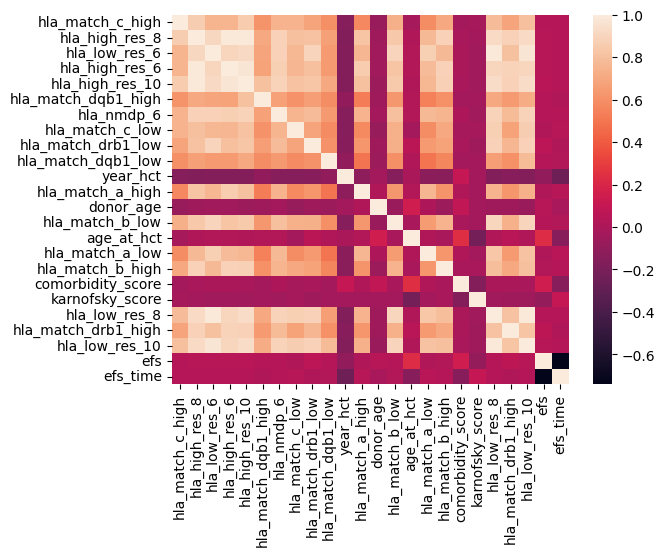

In [9]:
correlation = train_df.select_dtypes(include = ['int64', 'float64']).corr()
sns.heatmap(correlation)

In [10]:
'''We have a lot of highly correlated features and PCA or any other dimensionality reduction algorithm may seem viable at the first sight, but applying dimensionality reduction
would make the data hazy or unclear (features will be converted to components), so we do not go for any dimensionality reduction techniques.'''

'We have a lot of highly correlated features and PCA or any other dimensionality reduction algorithm may seem viable at the first sight, but applying dimensionality reduction\nwould make the data hazy or unclear (features will be converted to components), so we do not go for any dimensionality reduction techniques.'

Data Preprocessing

In [17]:
'''We will now handle the null values by imputing them using knn imputer and also simple imputer.'''

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load your data
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')

# Ensure train and test have the same columns
common_cols = list(set(train_df.columns) & set(test_df.columns))

# Identify column types **only from common columns**
hla_cols = [col for col in common_cols if col.startswith('hla')]
cat_cols = [col for col in common_cols if train_df[col].dtype == 'object']
num_cols = [col for col in common_cols if train_df[col].dtype in ['int64', 'float64']]

# Remove HLA columns from other lists (since they have a separate imputer)
cat_cols = [col for col in cat_cols if col not in hla_cols]
num_cols = [col for col in num_cols if col not in hla_cols]

# Define imputers
hla_imputer = ('hla_imputer', KNNImputer(n_neighbors=15), hla_cols)
cat_imputer = ('cat_imputer', SimpleImputer(strategy='most_frequent'), cat_cols)
num_imputer = ('num_imputer', SimpleImputer(strategy='median'), num_cols)

# Column transformer to apply different imputers
preprocessor = ColumnTransformer(transformers=[hla_imputer, cat_imputer, num_imputer])

# Create a pipeline
pipeline = Pipeline(steps=[('impute', preprocessor)])

# Apply pipeline to train data (drop target cols if they exist)
train_features = train_df.drop(columns=['efs_time', 'efs'], errors='ignore')
train_processed = pipeline.fit_transform(train_features)

# Apply same transformations to test data
test_processed = pipeline.transform(test_df)

# Convert results back to DataFrame with original column names
train_processed_df = pd.DataFrame(train_processed, columns=hla_cols + cat_cols + num_cols)
test_processed_df = pd.DataFrame(test_processed, columns=hla_cols + cat_cols + num_cols)

# Print processed data shapes
print("Train Processed Shape:", train_processed_df.shape)
print("Test Processed Shape:", test_processed_df.shape)



Train Processed Shape: (28800, 57)
Test Processed Shape: (3, 57)


In [18]:
test_processed_df.columns

Index(['hla_high_res_8', 'hla_high_res_6', 'hla_match_a_low', 'hla_low_res_6',
       'hla_match_drb1_low', 'hla_match_drb1_high', 'hla_match_c_high',
       'hla_high_res_10', 'hla_match_b_high', 'hla_match_dqb1_low',
       'hla_nmdp_6', 'hla_match_a_high', 'hla_low_res_8', 'hla_match_c_low',
       'hla_low_res_10', 'hla_match_b_low', 'hla_match_dqb1_high',
       'renal_issue', 'arrhythmia', 'tce_match', 'prior_tumor', 'graft_type',
       'sex_match', 'race_group', 'donor_related', 'rituximab', 'peptic_ulcer',
       'pulm_moderate', 'psych_disturb', 'pulm_severe', 'tce_imm_match',
       'melphalan_dose', 'diabetes', 'cmv_status', 'in_vivo_tcd',
       'conditioning_intensity', 'tce_div_match', 'prod_type', 'gvhd_proph',
       'mrd_hct', 'tbi_status', 'cardiac', 'vent_hist', 'rheum_issue',
       'ethnicity', 'dri_score', 'hepatic_mild', 'obesity', 'hepatic_severe',
       'prim_disease_hct', 'cyto_score', 'cyto_score_detail', 'donor_age',
       'comorbidity_score', 'year_hct',

In [ ]:
train_df = pd.read_csv('imputed_dataset.csv')
train_df.isnull().sum()

hla_match_c_high          0
hla_high_res_8            0
hla_low_res_6             0
hla_high_res_6            0
hla_high_res_10           0
hla_match_dqb1_high       0
hla_nmdp_6                0
hla_match_c_low           0
hla_match_drb1_low        0
hla_match_dqb1_low        0
hla_match_a_high          0
hla_match_b_low           0
hla_match_a_low           0
hla_match_b_high          0
hla_low_res_8             0
hla_match_drb1_high       0
hla_low_res_10            0
arrhythmia                0
cardiac                   0
cmv_status                0
conditioning_intensity    0
cyto_score                0
cyto_score_detail         0
diabetes                  0
donor_related             0
dri_score                 0
ethnicity                 0
graft_type                0
gvhd_proph                0
hepatic_mild              0
hepatic_severe            0
in_vivo_tcd               0
melphalan_dose            0
mrd_hct                   0
obesity                   0
peptic_ulcer        